## CURSO APRENDIZAJE AUTOMATICO AVANZADO.
### Tarea 3: Modelos  Supervisados

##### Integrantes:
* Ana María Urán González.
* Karen Lizeth Velásquez  Moná.

## Carga de base de datos

Importamos las  librerias necesarias  para  realizar el proceso de ingenieria de  caracteristicas

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier


Ajustamos  nuestro dataset para modelado segun los criterios  definidos  en el  notebook de la tarea 2 (Ingenieria de caracteristicas), recordemos que este corresponde  a los hurtos  realizados en la ciudad de  Medellín  durante  2019 y  nos  interesa  diseñar un algoritmo que nos  clasifique  el  hurto a personas  de las  otras  tipologías de  hurto.

In [3]:
Medellin=pd.read_csv('C:/Users/Acer/Downloads/Ana_base4.csv',sep=';',encoding = 'UTF-8') #Carga datos
Medellin2019=Medellin[(Medellin['Ano'] == 2019) & (Medellin['Caso_Hurto']==1)].drop(['Hurto',
            'Codigo_Stage_Hurto','Caso_Hurto','Ano','Minuto_Hurto','Nombre_Bien_Sijin_Hurto',
            'Conducta_Especial','Responsable_Indicador','Modelo_Hurto','Medio_Transporte',
            'Grupo_Sede_Receptora','Marca','Color','Fecha_Actualización_Hurto'], axis=1)
categoria_bien=['Tecnología','Dinero, joyas, piedras preciosas y título valor',
                'Vehículos de 2 o 4 ruedas','Documentos','Prendas de vestir y accesorios',
                'Otros elementos','Automóvil','Alimento','Electrodomésticos','Maquinaria y equipo']
filtro1=Medellin2019[Medellin2019['Categoria_Bien'].isin(categoria_bien)]
filtro2=filtro1[(filtro1['Modalidad'] != 'Sin dato')]
filtro3=filtro2[(filtro2['Edad_Hurto'] >=20 ) & (filtro2['Edad_Hurto'] <=62 )]

C:\Users\Acer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


A continuación crearemos las  variables nuevas

In [4]:
bienes=[]
tecnologia=['Tecnología']
Dinero=['Dinero, joyas, piedras preciosas y título valor']
Documentos=['Documentos']
Vehiculos=['Vehículos de 2 o 4 ruedas','Automóvil']
Ropa=['Prendas de vestir y accesorios']

for i in range(0,len(filtro3)):
    if filtro3['Categoria_Bien'].values.tolist()[i] in tecnologia:
        P='Tecnología'
    elif filtro3['Categoria_Bien'].values.tolist()[i] in Dinero:
        P='Dinero'
    elif filtro3['Categoria_Bien'].values.tolist()[i] in Documentos:  
        P='Documentos'
    elif filtro3['Categoria_Bien'].values.tolist()[i] in Vehiculos: 
        P='Vehiculos'
    elif filtro3['Categoria_Bien'].values.tolist()[i] in Ropa:
        P='Ropa'
    else:
        P='Otras'
    bienes.append(P)
filtro3['bienes']=bienes

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
Zona=[]
nororiental=[1,2,3,4]
centroriental=[8,9,10]
suroriental=[14]
noroccidental=[5,6,7]
cetroccidental=[11,12,13]
suroccidental=[15,16]

for i in range(0,len(filtro3)):
    if filtro3['Cod._Comuna'].values.tolist()[i] in nororiental:
        P='Nororiental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in centroriental:
        P='Centroriental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in suroriental:  
        P='Suroriental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in noroccidental: 
        P='Noroccidental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in cetroccidental:
        P='Centroccidental'
    elif filtro3['Cod._Comuna'].values.tolist()[i] in suroccidental:
        P='Suroccidental'
    else:
        P='Otras'
    Zona.append(P)
filtro3['Zona']=Zona

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
modalidades=[]
atracos=['Comisión de delito','Atraco']
Escopolamina=['Escopolamina']
Cosquilleo_raponazo=['Cosquilleo','Raponazo']
Engaño_descuido=['Descuido','Engaño','Simulando necesidad','Suplantación','Paquete chileno']

for i in range(0,len(filtro3)):
    if filtro3['Modalidad'].values.tolist()[i] in atracos:
        P='atracos'
    elif filtro3['Modalidad'].values.tolist()[i] in Escopolamina:
        P='Escopolamina'
    elif filtro3['Modalidad'].values.tolist()[i] in Cosquilleo_raponazo:  
        P='Cosquilleo_raponazo'
    elif filtro3['Modalidad'].values.tolist()[i] in Engaño_descuido: 
        P='Engaño_descuido'
    else:
        P='Otras'
    modalidades.append(P)
filtro3['modalidades']=modalidades

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
transporte=[]
caminata=['Caminata']
moto=['Motocicleta','Motocicleta con parrillero']
publico=['Metro','Taxi']
for i in range(0,len(filtro3)):
    if filtro3['Medio_Transporte_Agresor'].values.tolist()[i] in caminata:
        P='caminata'
    elif filtro3['Medio_Transporte_Agresor'].values.tolist()[i] in moto:  
        P='moto'
    elif filtro3['Medio_Transporte_Agresor'].values.tolist()[i] in publico: 
        P='publico'
    else:
        P='Otras'
    transporte.append(P)
filtro3['transporte']=transporte

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [8]:
lugar=[]
comercios=['Económica']
habitacional=['Habitacional']
culturales_deportivos=['Otro','Social','Cultura deportes y recreación']
transporte=['Transporte']
for i in range(0,len(filtro3)):
    if filtro3['Grupo_Lugar'].values.tolist()[i] in comercios:
        P='Comercios'
    elif filtro3['Grupo_Lugar'].values.tolist()[i] in habitacional:
        P='Habitacional'
    elif filtro3['Grupo_Lugar'].values.tolist()[i] in culturales_deportivos: 
        P='Cultural'
    elif filtro3['Grupo_Lugar'].values.tolist()[i] in transporte: 
        P='Transporte'
    else:
        P='Otras'
    lugar.append(P)
filtro3['lugar']=lugar

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
arma=[]
armas=['Arma cortopunzante','Arma de fuego']
otros=['Objeto contundente','Llave maestra']
sin_arma=['No']
for i in range(0,len(filtro3)):
    if filtro3['Arma_Medio'].values.tolist()[i] in armas:
        P='armas'
    elif filtro3['Arma_Medio'].values.tolist()[i] in otros:
        P='Otros_elementos'
    elif filtro3['Arma_Medio'].values.tolist()[i] in sin_arma:
        P='Sin_arma'
    else:
        P='Escopolamina'
    arma.append(P)
filtro3['arma']=arma

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [10]:
filtro3["convertido"]=pd.to_datetime(filtro3["Dia"],dayfirst=True)
filtro3["dia"]=filtro3["convertido"].apply(lambda row:row.day)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


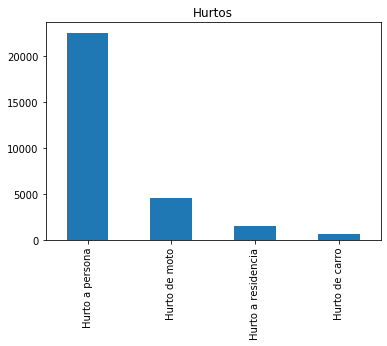

In [14]:
filtro3['Conducta'].value_counts().plot(kind='bar', title='Hurtos')
plt.show()

Como lo vemos en el anterior gráfico, existen un desbalance entre las  clases entre las  tipologias de hurto.
Este problema puede derivar en un deterioro  en la eficiencia del clasificador, aumentando así  los  casos de  Falsos-positivos ya que  el algoritmo desempeñaría una buena  labor  sobre la  clase mayoritaria en  detrimentos a la minoritaria debido a que  en la  muestra encuentra una  gran cantidad de  valores asociados a la categoría dominante.


In [12]:
Med2019=filtro3.drop(['Dia','Jornada','Categoria_Bien','Modalidad','Grupo_Bien','Bien','Categoria_Bien',
                        'Rango_Edad', 'Rango_Edad_Pisc','Grupo_Lugar','Arma_Medio','Cod._Barrio','Cod._Comuna',
                      'Geo_X_Hurto', 'Geo_Y_Hurto','Lugar',
                       'Medio_Transporte_Agresor', 'convertido'],axis=1)

In [13]:
dummies=pd.get_dummies(Med2019, columns=['Dia_nombre','Mes_Calendario','Sexo','Barrio','Comuna','Sede_Receptora',
                                                 'Estado_Civil','bienes','Zona','modalidades',
                                                 'transporte','lugar','arma'], drop_first=True)
dummies.head(5)

,Hora_Hurto,Conducta,Edad_Hurto,Valor_Hurto,dia,Dia_nombre_Jueves,Dia_nombre_Lunes,Dia_nombre_Martes,Dia_nombre_Miércoles,Dia_nombre_Sábado,...,transporte_caminata,transporte_moto,transporte_publico,lugar_Cultural,lugar_Habitacional,lugar_Otras,lugar_Transporte,arma_Otros_elementos,arma_Sin_arma,arma_armas
0,18,Hurto de moto,26,5000000,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,9,Hurto de moto,27,4200000,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
2,11,Hurto de moto,28,4000000,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
3,22,Hurto de moto,46,2500000,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,20,Hurto de moto,39,3500000,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0


## MODELOS

Separaremos  las  variables explicativas de la variable  objetivo, teniendo presente  construir  un conjunto de  datos  de  entrenamiento  y pronostico unico con el puedan ser modelados todos los procesos

In [16]:
x=dummies.drop(['Conducta'],axis=1)
y= dummies.loc[:,['Conducta']]

Compararemos varioas alternativas  que según la  literatura pueden ser  utilizadas ante situciones como esta, con el fin  de encontrar en este caso la mejor alternativa para clasificar nuestra variable  objetivo

Dividiremos nuestros  datos  tomando un 70% para el entrenamiento y un 30% para la validación, adicionalmente  definiremos una semilla aleatoria en 42 con el fin de que  en cada ejecución la seleccion de las  muestras  se  conserve

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 42)

### Random Forest

Entrenamos el modelo

In [18]:
rf = RandomForestClassifier(n_estimators = 500, #numero de arboles
                            criterion='gini', #función para medir la calidad de la división
                            max_depth=None, # Profundidad
                            n_jobs = -1, #Trabajos  ejecutados en paralelo
                            random_state = 42  #Inicio de la muestra 
                           )
                            
classifier=rf.fit(X_train, y_train.values.ravel())


In [60]:
predictions = classifier.predict(X_test)
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[6666,   51,    0,   27],
       [ 179,  277,    0,    5],
       [  10,    0,   45,  118],
       [  42,    0,   11, 1323]], dtype=int64)

Calculamos la matriz de confusión y las  medidas metricas del modelo (precisión, recall, f1)

In [37]:
print("Recall:",recall_score(y_test,predictions, average='weighted'))
print("F!:",f1_score(y_test,predictions, average='weighted'))
print("Accuracy:",sklearn.metrics.accuracy_score(y_test,predictions))

Recall: 0.9493945624857208
F!: 0.9436684057323842
Accuracy: 0.9493945624857208


## AdaBoostClassifier

En este caso emplearemos en adaboostclassifier partiendo que de el estimador base para las clases en un árbol de  decisión,el cual es el valor  default del  algoritmo

In [41]:
abc = AdaBoostClassifier(n_estimators=50 # Número de estimadores maximo en los que finaliza el refuero
                         , learning_rate=1, #tasa de aprendizaje
                        random_state=42)
model = abc.fit(X_train, y_train.values.ravel())

In [42]:
y_pred = model.predict(X_test)

In [43]:
sklearn.metrics.confusion_matrix(y_test,y_pred)

array([[5165, 1553,   10,   16],
       [  47,  404,    1,    9],
       [   3,    0,  152,   18],
       [ 309,    2,  522,  543]], dtype=int64)

In [45]:
print("Recall:",recall_score(y_test,y_pred, average='weighted'))
print("F!:",f1_score(y_test,y_pred, average='weighted'))
print("Accuracy:",sklearn.metrics.accuracy_score(y_test,y_pred))


Recall: 0.7155586017820424
F!: 0.7602802086870557
Accuracy: 0.7155586017820424


Ensambaremos ambos modelos para mirar si  existen algun mejor ajuste

## AdaBoostClassiffier ensablado con Random Forest

In [47]:
abcrf = AdaBoostClassifier(n_estimators=50 # Número de estimadores maximo en los que finaliza el refuero
                         , learning_rate=1, #tasa de aprendizaje
                         base_estimator=rf,  
                        random_state=42)
modelrf = abcrf.fit(X_train, y_train.values.ravel())

In [67]:
y_predrf = modelrf.predict(X_test)
sklearn.metrics.confusion_matrix(y_test,y_predrf)

array([[6665,   50,    0,   29],
       [ 165,  291,    0,    5],
       [  10,    0,   42,  121],
       [  37,    0,   12, 1327]], dtype=int64)

In [66]:
print("Recall:",recall_score(y_test,y_predrf, average='weighted'))
print("F!:",f1_score(y_test,y_predrf, average='weighted'))
print("Accuracy:",sklearn.metrics.accuracy_score(y_test,y_predrf))

Recall: 0.950993831391364
F!: 0.9454263815427658
Accuracy: 0.950993831391364
